In [16]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import xgboost as xgb

In [2]:
df = pd.read_csv('ads_ctr.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  10000 non-null  float64       
 1   Age                       10000 non-null  float64       
 2   Area Income               10000 non-null  float64       
 3   Daily Internet Usage      10000 non-null  float64       
 4   Ad Topic Line             10000 non-null  object        
 5   City                      10000 non-null  object        
 6   Gender                    10000 non-null  object        
 7   Country                   10000 non-null  object        
 8   Timestamp                 10000 non-null  datetime64[ns]
 9   Clicked on Ad             10000 non-null  int64         
 10  Hour                      10000 non-null  int32         
 11  Day                       10000 non-null  int32         
 12  Month              

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,21,9,6
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,17,16,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,10,29,6
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,14,21,6
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,10,21,7


In [4]:
# Store unique cities and countries before encoding
unique_cities = df['City'].unique()
unique_countries = df['Country'].unique()

# Initialize label encoders for categorical variables
label_encoders = {}

# Encode categorical variables
for col in ['City', 'Country', 'Gender']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()    

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,234,1,174,2016-06-09 21:43:05,0,21,9,6
1,41.73,31.0,61840.26,207.17,Optional full-range projection,460,1,166,2016-01-16 17:56:05,0,17,16,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,379,0,71,2016-06-29 10:50:45,0,10,29,6
3,59.88,28.0,56180.93,207.17,Balanced empowering success,269,0,205,2016-06-21 14:32:32,0,14,21,6
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,495,0,149,2016-07-21 10:54:35,1,10,21,7


In [5]:
X = df.drop(['Clicked on Ad', 'Ad Topic Line', 'Timestamp'], axis=1)
Y = df['Clicked on Ad']

In [6]:
X.head()
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Clicked on Ad, dtype: int64

In [10]:
# Split data into train and test sets
RANDOM_SEED =  42
SPLIT_RATIO = 0.2

ESTIMATORS = 100
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=SPLIT_RATIO, random_state=RANDOM_SEED)

In [12]:
clf_xgb = xgb.XGBClassifier(n_estimators=ESTIMATORS, random_state=RANDOM_SEED)  # Use XGBClassifier
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [17]:
# Evaluate the model
y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Print classification report in DataFrame
print("\nClassification Report:")
print(class_report_df)

Accuracy: 0.882

Classification Report:
              precision    recall  f1-score   support
0              0.881373  0.886588  0.883972  1014.000
1              0.882653  0.877282  0.879959   986.000
accuracy       0.882000  0.882000  0.882000     0.882
macro avg      0.882013  0.881935  0.881966  2000.000
weighted avg   0.882004  0.882000  0.881994  2000.000


In [19]:
# Get and sort feature importances
feature_importances = clf_xgb.feature_importances_
feature_names = X_train.columns
total_importance = sum(feature_importances)  # Calculate total importance

percentage_importances = (feature_importances / total_importance) * 100
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': percentage_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

feature_importance_df.head()

,feature,importance
1,Age,34.697567
6,Country,10.003303
4,City,9.999837
8,Day,7.616452
7,Hour,7.607570


In [20]:
# Find missing values
X.isnull().sum()/len(X)*100

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
City                        0.0
Gender                      0.0
Country                     0.0
Hour                        0.0
Day                         0.0
Month                       0.0
dtype: float64

In [21]:
X['Item_Weight'].fillna(X['Item_Weight'].median(), inplace=True)
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0], inplace=True)
X.var()

Daily Time Spent on Site    2.466201e+02
Age                         7.349586e+01
Area Income                 1.780546e+08
Daily Internet Usage        1.666350e+03
City                        2.414386e+04
Gender                      2.486111e-01
Country                     4.209158e+03
Hour                        5.035039e+01
Day                         7.424236e+01
Month                       3.950317e+00
dtype: float64

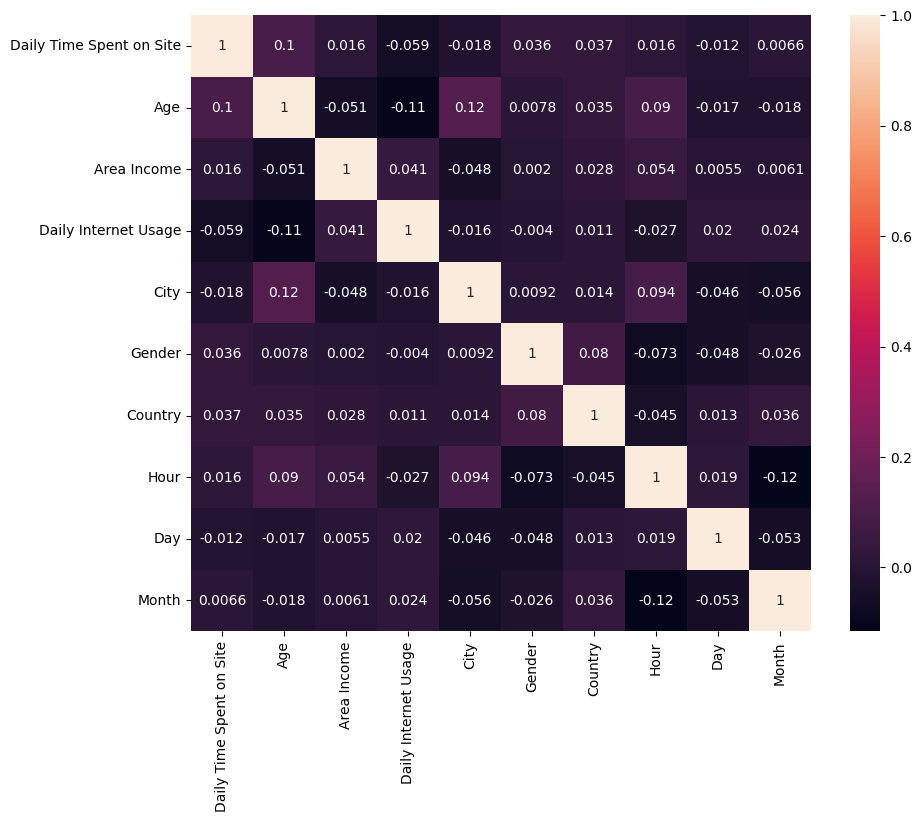

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True)
plt.show()